# DSL

In [25]:
using Catalyst, DiffEqBase, OrdinaryDiffEq

In [3]:
rn = @reaction_network begin
  2.0, X + Y --> XY               
  1.0, XY --> Z1 + Z2            
end

Model ##ReactionSystem#257 with 2 equations
States (5):
  X(t)
  Y(t)
  XY(t)
  Z1(t)
  Z2(t)
Parameters (0):

In [15]:
odesys = convert(ODESystem, rn)

Model ##ReactionSystem#257 with 5 equations
States (5):
  X(t)
  Y(t)
  XY(t)
  Z1(t)
  Z2(t)
Parameters (0):

In [16]:
speciesmap(rn)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 5 entries:
  Z2(t) => 5
  Z1(t) => 4
  X(t)  => 1
  Y(t)  => 2
  XY(t) => 3

In [17]:
paramsmap(rn)

Dict{Any, Any}()

In [18]:
u0 = [0.,0.,20.,4.,2.]
tspan= [0.,100.]

2-element Vector{Float64}:
   0.0
 100.0

In [20]:
oprob = ODEProblem(odesys, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 5-element Vector{Float64}:
  0.0
  0.0
 20.0
  4.0
  2.0

In [26]:
sol = solve(oprob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 48-element Vector{Float64}:
   0.0
   0.07242670813835209
   0.25984492720750507
   0.5309400866138043
   0.8700335389738416
   1.2943673311321227
   1.7908133167305613
   2.35828648730069
   2.9847235202715114
   3.663894181579386
   4.386741272269649
   5.146846728101266
   5.937639773226912
   ⋮
  62.958252796170015
  66.51089298186601
  70.05240620478085
  73.57397580806972
  77.07929536648017
  80.5769049623402
  84.07431406424735
  87.5754556936002
  91.08084395283979
  94.58901919051263
  98.09809389689507
 100.0
u: 48-element Vector{Vector{Float64}}:
 [0.0, 0.0, 20.0, 4.0, 2.0]
 [0.0, 0.0, 18.602678308333836, 5.397321691666166, 3.3973216916661655]
 [0.0, 0.0, 15.423423348307793, 8.576576651692209, 6.576576651692209]
 [0.0, 0.0, 11.7610384335349, 12.238961566465102, 10.238961566465102]
 [0.0, 0.0, 8.378752344791428, 15.621247655208574, 13.621247655208574]
 [0.0, 0.0, 5.48143170135722, 18.51856829864278

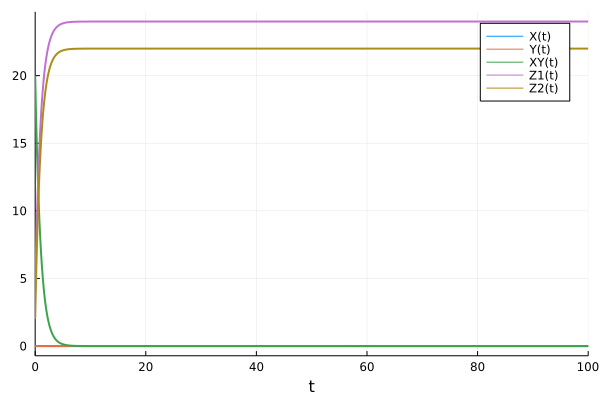

In [27]:
using Plots
plot(sol, lw=2)